# - Playing LDA on the arxiv -
If you have skills on this and/or are interested in contributing, you are welcome!

feedback: sequi@unsam.edu.ar Ezequiel Alvarez

# Instructions: press [shift+enter] to run every cell from top to bottom.  And follow instructions in it.

## Set up 0: choose hep-th, hep-ph ot cond-mat 

In [1]:
print("1: hep-ph")
print("2: hep-th")
print("3: cond-mat")
inp = int(input("Enter your field: "))

if inp == 1:
    field = "hep-ph"
elif inp == 2:
    field = "hep-th"
elif inp == 3:
    field = "cond-mat"
else:
    print("Invalid input!")

1: hep-ph
2: hep-th
3: cond-mat
Enter your field: 1


## Set up

In [2]:
import pandas as pd
import pickle
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import numpy as np
np.random.seed(2018)
from random import randint
from operator import add
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

## Load Saved Model & check its basic features

In [3]:
# Load model, data and dictionary
lda_model = gensim.models.LdaMulticore.load("models/"+field)
data = pd.read_pickle('data/data_'+field+'.pickle');
with open ('data/bow_corpus_'+field+'.pickle','rb') as file:
    bow_corpus = pickle.load(file)

In [13]:
# Get the number of topis in the model
Ntopics=0;
for idx, topic in lda_model.print_topics(-1):
    Ntopics=Ntopics+1;

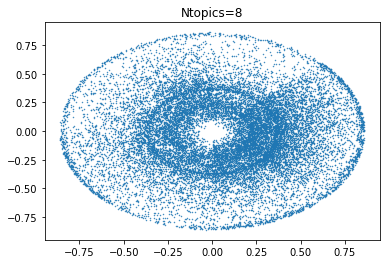

Pizza plot:
 - Each document in the corpus is represented by only one point.
 - The pizza is divided into Ntopics=8 imaginary slices
 - Each pizza slice corresponds to each one of the reconstructed topics.
 - Each point is placed in the slice corresponding to the main topic of the document.
 - The distance to the centre of each point is related to the fraction of the main topic that has the given document.
 - The theta angle of each point within each slice is random.
 - Therefore the more in the centre are the points, the worst is the topic reconstruction because would mean that each document has all the topics and there would not be classification according to topics.
 - Points in the crust corresponds to documents well defined within one topic.
 Less dense/empty slices would correspond to a useless topic.


In [28]:
import matplotlib.pyplot as plt
import random
import math
# Get the "pizza" array
pizza = []
for bow in bow_corpus:
    vec=lda_model[bow] # Get the topic distribution of the document
    r = sum([(i[1]-1/Ntopics)**2 for i in vec]) # Get a measure on how inhomogeneusly is the document distributed in the topics
    vec.sort(key=lambda tup: tup[1]) # Sort it
    theta = 2 * math.pi * ( (vec[Ntopics-1][0] + random.random() ) * 1/Ntopics )# Get the topic with maximum fraction in the document
    pizza.append((r*math.cos(theta),r*math.sin(theta)))
# Make the "pizza" plot
s=np.array(pizza)
x=s[:,0]
y=s[:,1]
plt.scatter(x,y,s=.2)
plt.plot([0,0],[.5,.5])
title0='Ntopics='+str(Ntopics)
plt.title(title0)
plt.show();
print("Pizza plot:\n - Each document in the corpus is represented by only one point.\n - The pizza is divided into Ntopics="+str(Ntopics)+" imaginary slices\n - Each pizza slice corresponds to each one of the reconstructed topics.\n - Each point is placed in the slice corresponding to the main topic of the document.\n - The distance to the centre of each point is related to the fraction of the main topic that has the given document.\n - The theta angle of each point within each slice is random.\n - Therefore the more in the centre are the points, the worst is the topic reconstruction because would mean that each document has all the topics and there would not be classification according to topics.\n - Points in the crust corresponds to documents well defined within one topic.\n Less dense/empty slices would correspond to a useless topic.")

## Learn your preferences 

In [6]:
topicscore = [0] * Ntopics # this resets the preferences, run it again if you change player

In [7]:
# You can run this cell many times to make the machine learn more about your preferences
print("We will ask you to rank a few papers between -10 (worst) and +10 (best).  Try to be accurate, since from these answers the machine will learn your preferences for the next steps!\n\n")
total = input("With how many papers you want to train ? (recommended 20 at least)")
for i in range(int(total)):
    docnumber = randint(0,len(bow_corpus))
    print("\n"+color.BOLD+data.iloc[docnumber,2]+color.END+"\n\n"+data.iloc[docnumber,3])
    score = int(input("(paper "+str(i)+" of "+total+")\nScore this paper between -10 (worst) and +10 (best): "))
    score2add = [row[1]*score for row in lda_model[bow_corpus[docnumber]]]
    if ( len(score2add) != Ntopics ):
        print('Not good length')
    if ( len(score2add) == Ntopics ):
        topicscore=list( map(add, topicscore, score2add) )
        print("----")
     
#print("\n\nGood, your score over topics is:\n")
#print(topicscore)
topicscore = np.array(topicscore)

We will ask you to rank a few papers between -10 (worst) and +10 (best).  Try to be accurate, since from these answers the machine will learn your preferences for the next steps!




KeyboardInterrupt: 

## Game 1: Sort 3 random papers according to your preferences

In [ ]:
for k in range(10):
    out = pd.DataFrame(columns=['score', 'title'])
    for i in range(3):
        docnumber = randint(0,len(bow_corpus))
        thistitle=np.array([row[1] for row in lda_model[bow_corpus[docnumber]]])
        if ( len(thistitle) == Ntopics ):
            thisscore=thistitle.dot(topicscore)
        out = out.append({'score': thisscore, 'title':data.iloc[docnumber,2]},ignore_index=True)
    pd.options.display.max_colwidth = 150
    display(out[['title']])
    input("Press [enter] to see how I guess your preferences!")
    display(out.sort_values('score',ascending=False))
    print("---------------------------------------")


## Game 2: Match between 2 papers including abstracts

In [ ]:
    for hh in range(10):
     docnumber1 = randint(0,len(bow_corpus))
     docnumber2 = randint(0,len(bow_corpus))     
     thistitle1=np.array([row[1] for row in lda_model[bow_corpus[docnumber1]]])
     thistitle2=np.array([row[1] for row in lda_model[bow_corpus[docnumber2]]])
     print("Paper A: "+color.BOLD+data.iloc[docnumber1,2]+color.END+'\n'+data.iloc[docnumber1,3]+'\n')
     print("Paper B: "+color.BOLD+data.iloc[docnumber2,2]+color.END+'\n'+data.iloc[docnumber2,3]+'\n')
     input("Press [enter] to see how I guess your preferences!")
     print ("\nThis is my preference:\n")
     score1=thistitle1.dot(topicscore)
     score2=thistitle2.dot(topicscore)
     if (score1 > score2):
            print("1)"+data.iloc[docnumber1,2]+"\t (Score: "+str(round(score1,2))+")")
            print("2)"+data.iloc[docnumber2,2]+"\t (Score: "+str(round(score2,2))+")"+"\n--------------\n")
     else:
            print("1)"+data.iloc[docnumber2,2]+"\t (Score: "+str(round(score2,2))+")")
            print("2)"+data.iloc[docnumber1,2]+"\t (Score: "+str(round(score1,2))+")"+"\n--------------\n")
     input("Press [enter] to see next papers")

# Bonus Track: get your most interesting papers in the Corpus!

In [ ]:
allscores=[]
for docnumber in range(len(data)):
    thistitle=np.array([row[1] for row in lda_model[bow_corpus[docnumber]]])
    thisscore=thistitle.dot(topicscore)
    allscores.append(thisscore)
data['score'] = allscores
sorted_data=data.sort_values('score',ascending=False)

### Your most interesting papers

In [ ]:
display(sorted_data[['title','authors','score']][:20])

### Your less interesting papers

In [ ]:
display(sorted_data[['title','authors','score']][-10:])

# For the future
There are so many things one could do with this tool, let's consider just the very basic add-ons required to improve the algorithm
- Include authors information
- Current stemming of language is the available for normal English, we should include special add-ons to this, as for instance: considering "\\$ADS\\$" as "ADS", "\\$t\\$" as "top", and many more of these and other kind as well.
- Etc. etc.
